In [ ]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 12.1 MB/s eta 0:00:00


In [ ]:
import deepxde as dde
from deepxde.backend import tf

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [ ]:
!pip install -U pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 10.2 MB/s eta 0:00:00


In [ ]:

import numpy as np
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import random
import deepxde as dde
import numpy as np
import deepxde as dde
from matplotlib import pyplot as plt
import numpy as np
import skopt
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_objective
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args

if dde.backend.backend_name == "pytorch":
    sin = dde.backend.pytorch.sin
else:
    from deepxde.backend import tf

    sin = tf.sin


# Clear TensorFlow session
tf.keras.backend.clear_session()

def pde(x, y):
     dy_x = dde.grad.jacobian(y, x, i=0, j=0)
     dy_t = dde.grad.jacobian(y, x, i=0, j=1)
     dy_xx = dde.grad.hessian(y, x, i=0, j=0)

     return dy_t + y * dy_x - 0.5*dy_xx

#geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
geom = dde.geometry.Interval(-2, 2)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.DirichletBC(geomtime, lambda x: 0, lambda _, on_boundary: on_boundary)
ic = dde.IC(geomtime, lambda x: -np.sin(np.pi * x[:, 0:1]), lambda _, on_initial: on_initial)

data = dde.data.TimePDE(geomtime, pde, [bc, ic], num_domain=2500, num_boundary=700, num_initial=600,num_test=1500 )

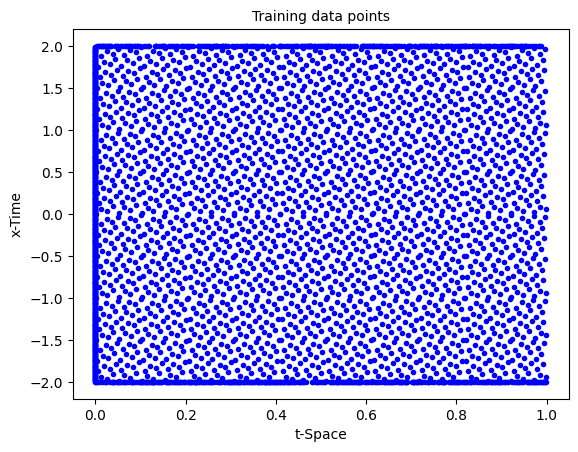

In [ ]:
# Extracting the training data points from the 'data' object
x_train = data.train_points()[:, 1]
t_train = data.train_points()[:, 0]

# Plotting the training data points using red crosses ('xr')
plt.plot(x_train, t_train, '.b', clip_on=False)

# Setting the labels and title for the plot
plt.xlabel('t-Space')
plt.ylabel('x-Time')
plt.title('Training data points', fontsize=10)

# Saving the plot as 'Training_data.eps' with dpi (dots per inch) set to 100
plt.savefig('Training_data.eps', dpi=100)

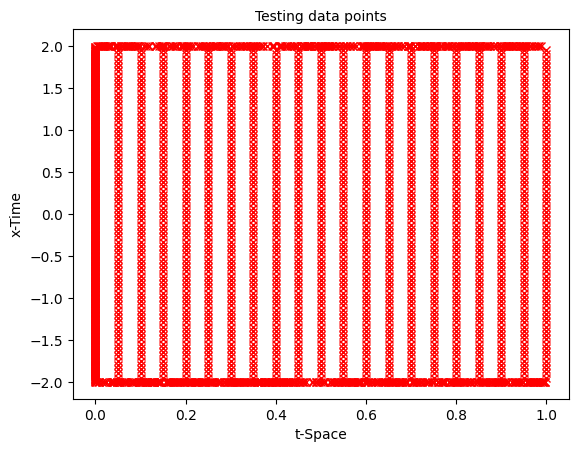

In [ ]:
# Extracting the testing data points from the 'data' object
x_test = data.test_points()[:, 1]
t_test = data.test_points()[:, 0]

# Plotting the testing data points using red crosses ('xr')
plt.plot(x_test, t_test, 'xr', clip_on=False)

# Setting the labels and title for the plot
plt.xlabel('t-Space')
plt.ylabel('x-Time')
plt.title('Testing data points', fontsize=10)

# Saving the plot as 'test_data.eps' with dpi (dots per inch) set to 100
plt.savefig('test_data.eps', dpi=100)


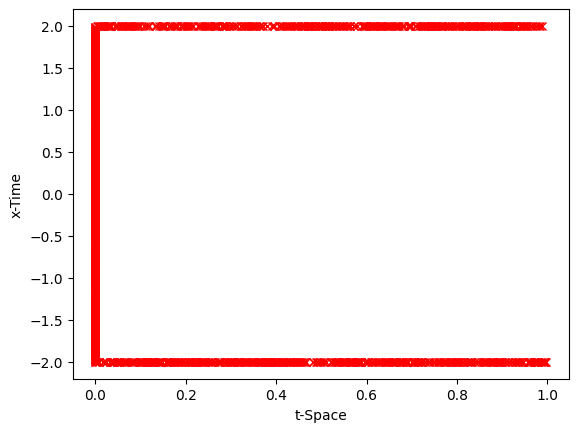

In [ ]:
# Extracting the boundary condition (BC) points from the 'data' object
x_bc = data.bc_points()[:, 1]
t_bc = data.bc_points()[:, 0]

# Plotting the boundary condition (BC) points using red crosses ('xr')
plt.plot(x_bc, t_bc, 'xr', clip_on=False)

# Setting the labels for the plot
plt.xlabel('t-Space')
plt.ylabel('x-Time')

# Display the plot
plt.show()
#plt.autoscale(enable=True, axis='both', tight=True)

In [ ]:
# Number of Boundary points
len(data.bc_points())


1300

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('pgf')
import tensorflow as tf
import numpy as np
import scipy.io
from scipy.interpolate import griddata
import time
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

Compiling model...
Building feed-forward neural network...
'build' took 0.120358 s

'compile' took 0.822981 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.71e-01, 7.34e-01, 1.76e-02]    [3.12e-01, 7.34e-01, 1.76e-02]    []  
400       [5.08e-05, 5.47e-05, 1.54e-02]    [5.08e-05, 5.47e-05, 1.54e-02]    []  
800       [2.05e-05, 6.76e-05, 1.54e-02]    [2.53e-05, 6.76e-05, 1.54e-02]    []  
1200      [1.46e-05, 7.77e-05, 1.54e-02]    [1.81e-05, 7.77e-05, 1.54e-02]    []  
1600      [1.32e-05, 9.14e-05, 1.53e-02]    [1.57e-05, 9.14e-05, 1.53e-02]    []  
2000      [1.48e-05, 1.08e-04, 1.53e-02]    [1.69e-05, 1.08e-04, 1.53e-02]    []  
2400      [1.82e-05, 1.24e-04, 1.53e-02]    [2.07e-05, 1.24e-04, 1.53e-02]    []  
2800      [2.16e-05, 1.33e-04, 1.53e-02]    [2.46e-05, 1.33e-04, 1.53e-02]    []  
3200      [2.47e-05, 1.37e-04, 1.52e-02]    [2.83e-05, 1.37e-04, 1.52e-02]    []  
3600      [2.84e-05, 1.39e-04, 1.

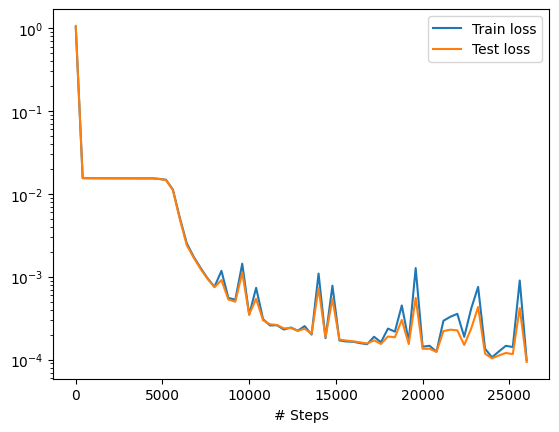

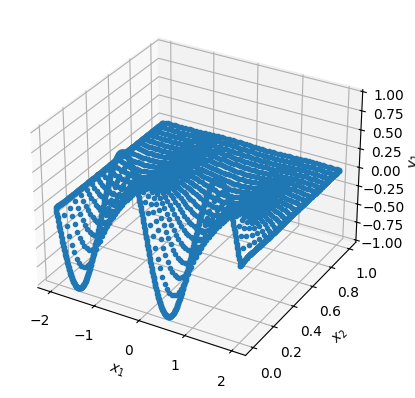

In [ ]:
# Bayesian optimal parameters for PINN used here for final model development
# Setting a specific random seed for reproducibility
dde.config.set_random_seed(27)
lamda=0.03110

# Defining the neural network architecture with 5 hidden layers, each having 30 units and using 'sin' activation function
net = dde.nn.FNN([2] + [30] * 5 + [1], "sin", "Glorot normal")

# Creating the PINN model with the specified data and neural network
model = dde.Model(data, net)

# Compiling the model with the 'adam' optimizer and a specific learning rate
model.compile("adam", lr=1.0e-3, loss_weights=(1, 1, lamda))

# Training the model for 25000 iterations and displaying the training progress every 200 iterations
losshistory, train_state = model.train(iterations=26000, display_every=400)

# Saving the plot of the loss history and the state of the training process (optional)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)


In [ ]:
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
# Generating time (t) and space (x) grids
t=np.linspace(0, 1,201).reshape(-1,1) # 101 evenly spaced points between 0 and 1, reshaped to a column vector
x=np.linspace(-2, 2,201).reshape(-1,1)# 101 evenly spaced points between 0 and 10, reshaped to a column vector
# Creating 2D grids (xx and tt) from 1D x and t arrays
xx, tt = np.meshgrid(x, t)
# Stacking the xx and tt grids to form the input data matrix X
X = np.vstack((np.ravel(xx), np.ravel(tt))).T

# Predicting the solution using the trained model
y_pred = model.predict(X)
# Predicting the residual using the trained model
f = model.predict(X, operator=pde)
print("Mean residual:", np.mean(np.absolute(f)))
U_pred =y_pred.flatten().reshape(201, 201) # Predicted solution Over the 2D domain

Mean residual: 0.003634421


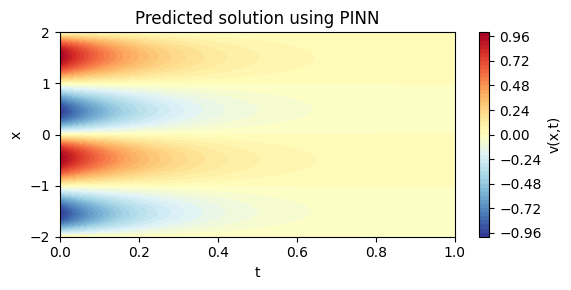

In [ ]:
# Importing the required libraries
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Create a figure and a set of subplots
plt.figure(figsize=(6, 3))
cp = plt.contourf(tt, xx, U_pred, levels=50, cmap='RdYlBu_r')

plt.colorbar(cp, label='v(x,t)')
plt.xlabel('t')
plt.ylabel('x')
plt.title("Predicted solution using PINN")
plt.tight_layout()
plt.show()


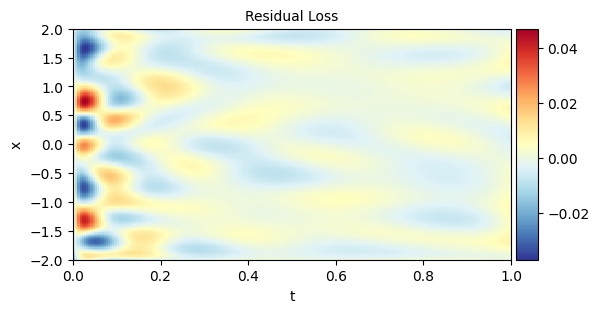

In [ ]:
# Pde Residual loss
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(6, 3))

# Plot the 2D image of the residual using imshow
h = ax.imshow(f.reshape(201, 201).T, interpolation='nearest', cmap='RdYlBu_r',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto')

# Add a colorbar for the image
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

# Set the labels, title, and legend for the plot
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Residual Loss', fontsize=10)

# Save the plot as 'u_residual.eps' with dpi (dots per inch) set to 100
plt.savefig('u_residual.eps', dpi=100)

In [ ]:
import pandas as pd

# Assuming you have already computed U_pred
data0 = {'x': xx.flatten(), 't': tt.flatten(), 'type': [0] * len(xx.flatten()),'y_pred': U_pred.flatten()}
df0 = pd.DataFrame(data0)

In [ ]:
X = df0[['t','x']].values
y = df0['y_pred'].values

In [ ]:
df0

,x,t,type,y_pred
0,-2.00,0.0,0,0.024671
1,-1.98,0.0,0,-0.042487
2,-1.96,0.0,0,-0.109961
3,-1.94,0.0,0,-0.177365
4,-1.92,0.0,0,-0.244301
...,...,...,...,...
40396,1.92,1.0,0,0.002731
40397,1.94,1.0,0,0.002408
40398,1.96,1.0,0,0.002089
40399,1.98,1.0,0,0.001774


In [ ]:
import pysr
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

# Extract features and target variable
X_raw = df0[['x', 't']].values
y = df0['y_pred'].values

# Fit the PySR model
model = PySRRegressor(
    niterations=25,
    batching=True,
    batch_size=264,
    fast_cycle=True,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["exp", "sin", "cos"],
    populations=30,
    model_selection='best',
    #maxsize=30,
)
model.fit(X_raw, y)

/usr/local/lib/python3.11/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.060e+03
Progress: 119 / 750 total iterations (15.867%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           4.941e-02  0.000e+00  y = 0.00063615
3           4.640e-02  3.148e-02  y = x₀ * 0.0475
5           4.630e-02  1.029e-03  y = sin(exp(x₀)) * -0.076707
6           3.003e-02  4.330e-01  y = sin(x₀ / 0.31888) * -0.21048
8           2.996e-02  1.207e-03  y = sin((x₀ / -0.28979) * 0.90695) * 0.20254
9           2.502e-02  1.802e-01  y = sin(x₀ / -0.31723) * (0.22423 * cos(x₁))
11          2.160e-02  7.352e-02  y = sin(x₀ / -0.31723) * (cos(x₁ * 1.5332) * 0.22423)
12          2.650e-03  2.098e+00  y = ((sin(x₀ / -0.32131) * 0.016827) / (x₁ + 0.065506)) / ...
                                      0.21466
───────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                      0.00054638286   
	1        0.031477                                    x0 * 0.04738908   
	2        0.001028                         sin(exp(x0)) * -0.07670721   
	3        0.435856                 sin(x0 / -0.32008597) * 0.19717509   
	4        0.476639            sin(x0 * -3.1296291) * (0.6761787 - x1)   
	5  >>>>  4.003343       sin(x0 / -0.32008597) * exp(x1 / -0.1964047)   
	6        0.025175  exp((x1 / -0.20158643) - 0.02114618) * sin(x0 ...   
	7        0.002317  (sin(x0 / -0.32011652) * exp((x1 / -0.20163217...   
	
	       loss  complexity  
	0  0.049411           1  
	1  0.046397           3  
	2  0.046301           5  
	3  0.029944           6  
	4  0.011542           8  
	5  0.000211           9  
	6  0.000200          11  
	7  0.000199          13  
]

  - outputs/20250603_100124_18h57q/hall_of_fame.csv


In [ ]:
print(model.sympy())

exp(x1/(-0.1964047))*sin(x0/(-0.32008597))


In [ ]:
print(model.latex())

e^{\frac{x_{1}}{-0.196}} \sin{\left(\frac{x_{0}}{-0.320} \right)}


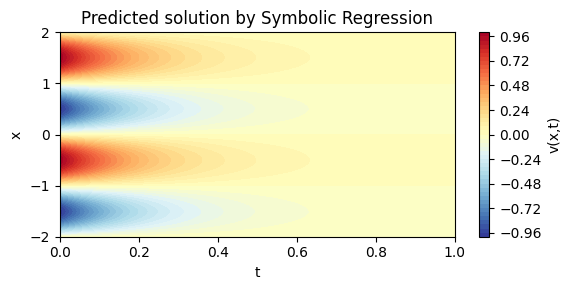

In [ ]:
t=np.linspace(0,1,201).reshape(-1,1)
x=np.linspace(-2,2,201).reshape(-1,1)
xx, tt = np.meshgrid(x, t)
X = np.vstack((np.ravel(xx), np.ravel(tt))).T


def my_function(x0, x1):
    term1 =np.exp(x1/(-0.1964047))*np.sin(x0/(-0.32008597))
    term2 = 0
    return (term1)

U_SymReg = my_function(xx, tt)

plt.figure(figsize=(6, 3))
cp = plt.contourf(tt, xx, U_SymReg, levels=50, cmap='RdYlBu_r')

plt.colorbar(cp, label='v(x,t)')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Predicted solution by Symbolic Regression', )
plt.tight_layout()
plt.show()

Computed indices: [40, 80, 120]


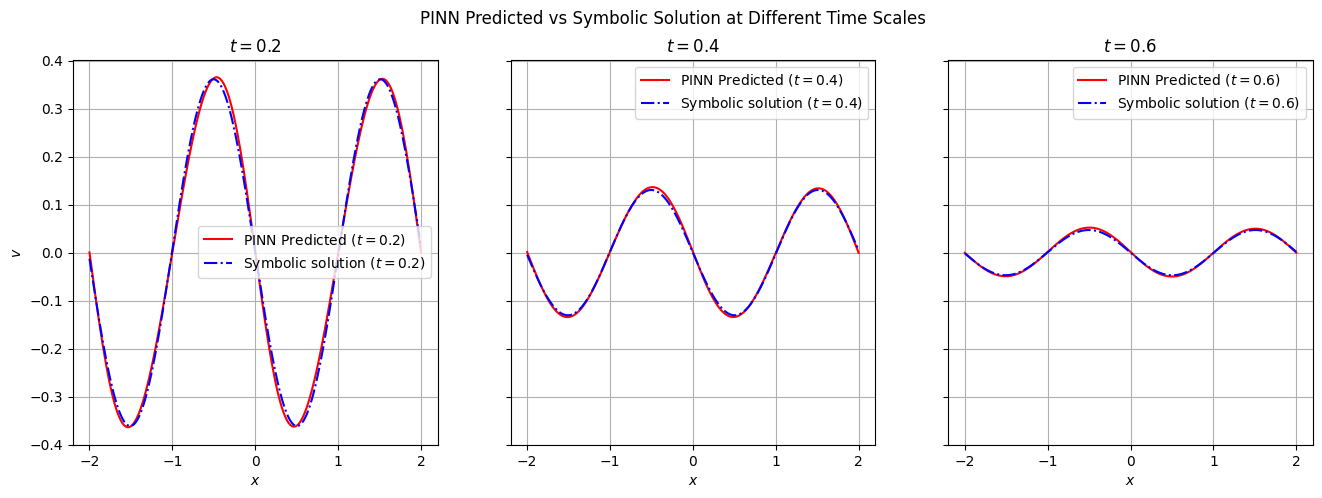

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters for time discretization
T = 1.0    # Total time
N_t = 201  # Number of time steps
delta_t = T / (N_t - 1)

# Define spatial domain (assuming this is given)
#x = np.linspace(-2, 2, 101)  # Example spatial domain

# Example simulated U_pred (assuming a placeholder function)
#U_pred = np.sin(np.pi * x) * np.exp(-0.5 * np.array([t/delta_t for t in range(N_t)])[:, None])

def my_function(x0, x1):
    term1 =np.exp(x1/(-0.1964047))*np.sin(x0/(-0.32008597))
    term2 = 0
    return (term1)

# Time points of interest
time_points = [0.2, 0.4, 0.6]  # Three time slices

# Compute indices
indices = [round(t / delta_t) for t in time_points]
print("Computed indices:", indices)

# Evaluate the function over the grid
U_SymReg = my_function(xx, tt)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

# Colors for predicted and actual solutions
pred_color = 'r'
actual_color = 'b'

# Plot each slice in a separate subplot
for ax, idx, t in zip(axes, indices, time_points):
    ax.plot(x, U_pred[idx, :], pred_color, label=f'PINN Predicted ($t = {t}$)')
    ax.plot(x, U_SymReg[idx, :], actual_color, linestyle='-.', label=f'Symbolic solution ($t = {t}$)')
    ax.set_xlabel('$x$')
    ax.set_title(f'$t = {t}$')
    ax.grid()
    ax.legend()

# Global figure settings
axes[0].set_ylabel('$v$')  # Set only on the first subplot for clarity
fig.suptitle("PINN Predicted vs Symbolic Solution at Different Time Scales", fontsize=12)

# Save and show the figure
plt.savefig('w_slice_comparison.eps', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
print("Mean residual error of Symbolic Regression model is: ", np.mean(np.absolute(U_SymReg)))
print("Mean absolute error between PINN and Symbolic solution:", np.mean(np.absolute(U_pred-U_SymReg)))
print("Percentage error= ",(np.mean(np.absolute(U_pred-U_SymReg)))*100)

Mean residual error of Symbolic Regression model is:  0.1253192934886184
Mean absolute error between PINN and Symbolic solution: 0.007257879855665432
Percentage error=  0.7257879855665432


## Finite Difference Method

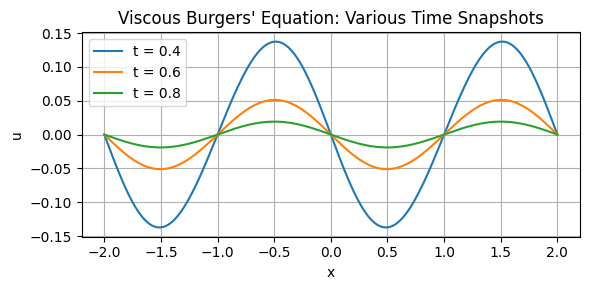

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x_start, x_end = -2.0, 2.0     # spatial domain
t_start, t_end = 0.0, 1.0      # time domain
nx = 201                       # number of spatial points
nt = 201                       # number of time points
nu = 0.5                       # viscosity
cfl = 0.1                      # CFL number for stability

# Discretization
dx = (x_end - x_start) / (nx - 1)
x = np.linspace(x_start, x_end, nx)
dt = cfl * dx**2 / nu
nt = int((t_end - t_start) / dt)
dt = (t_end - t_start) / nt  # recompute dt based on rounded nt
t = np.linspace(t_start, t_end, nt)

# Initial condition
def initial_condition(x):
    return -np.sin(np.pi * x)

# Boundary condition
def apply_boundary(u):
    u[0] = 0
    u[-1] = 0
    return u

# Initialize
u = initial_condition(x)
u = apply_boundary(u)
solution_snapshots = {}
plot_times = [0.4, 0.6, 0.8]

# Store full space-time solution
u_all = np.zeros((nt, nx))
u_all[0, :] = u.copy()

# Save t = 0 snapshot explicitly
if 0.0 in plot_times:
    solution_snapshots[0.0] = u.copy()

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    u[1:-1] = (un[1:-1]
               - dt / (2 * dx) * un[1:-1] * (un[2:] - un[:-2])
               + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2]))
    u = apply_boundary(u)
    current_time = (n + 1) * dt
    if np.any(np.isclose(current_time, plot_times, atol=dt / 2)):
        solution_snapshots[round(current_time, 3)] = u.copy()

    u_all[n, :] = u.copy()

# Plotting
plt.figure(figsize=(6, 3))
for time_key in sorted(solution_snapshots):
    plt.plot(x, solution_snapshots[time_key], label=f't = {time_key}')
plt.xlabel('x')
plt.ylabel('u')
plt.title("Viscous Burgers' Equation: Various Time Snapshots")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


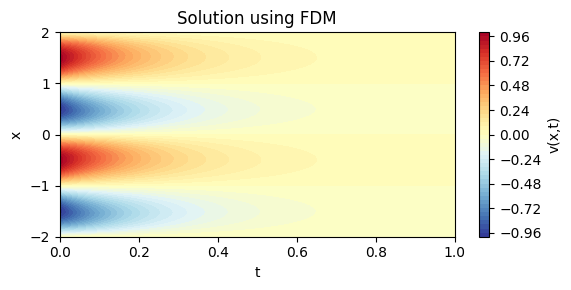

In [ ]:
# Contour plot
X, T = np.meshgrid(x, t)
plt.figure(figsize=(6, 3))
cp = plt.contourf(T, X, u_all, levels=50, cmap='RdYlBu_r')
plt.colorbar(cp, label='v(x,t)')
plt.xlabel('t')
plt.ylabel('x')
plt.title("Solution using FDM")
plt.tight_layout()
plt.show()

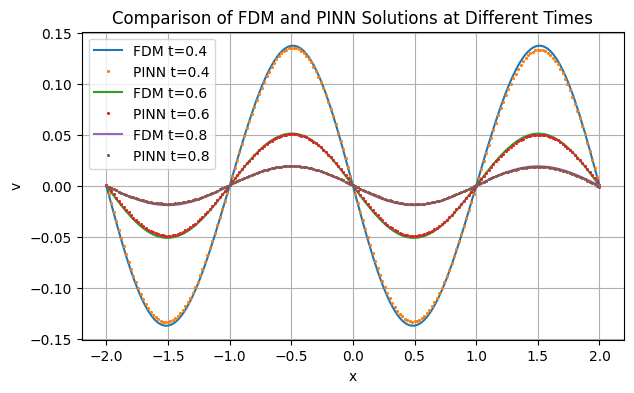

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_pinn = np.linspace(-2, 2, 201).reshape(-1,1)
t_pinn = np.linspace(0, 1, 201).reshape(-1,1)

plot_times = [0.4, 0.6, 0.8]

time_indices = [np.argmin(np.abs(t_pinn.flatten() - pt)) for pt in plot_times]

plt.figure(figsize=(7, 4))
for i, idx in enumerate(time_indices):
    plt.plot(x.flatten(), u_all[np.argmin(np.abs(t.flatten() - plot_times[i])), :], label=f'FDM t={t[np.argmin(np.abs(t.flatten() - plot_times[i]))]:.1f}', linestyle='-')
    plt.plot(x_pinn.flatten(), U_pred[idx, :], label=f'PINN t={t_pinn[idx][0]:.1f}', marker='*', linestyle='None', markersize=1.8)

plt.xlabel('x')
plt.ylabel('v')
plt.title('Comparison of FDM and PINN Solutions at Different Times')
plt.legend()
plt.grid(True)
plt.show()

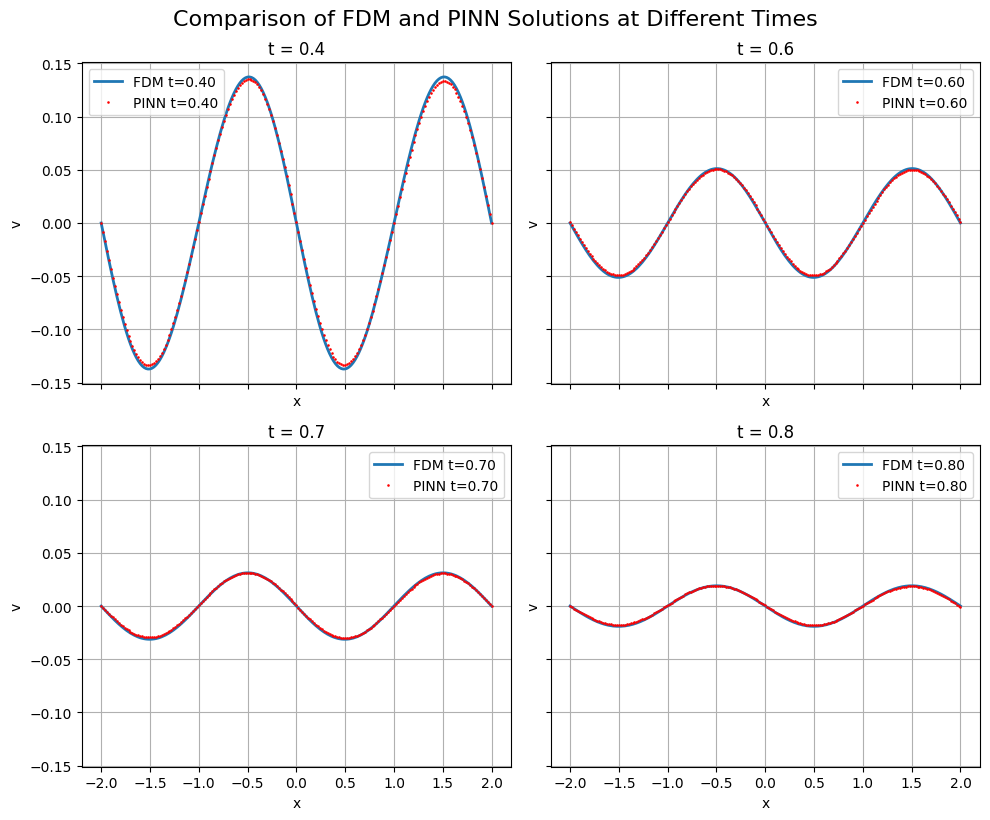

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plot_times = [0.4, 0.6, 0.7, 0.8]  # times to compare

# Find indices in FDM and PINN time arrays closest to each plot time
fdm_time_indices = [np.argmin(np.abs(t.flatten() - pt)) for pt in plot_times]
pinn_time_indices = [np.argmin(np.abs(t_pinn.flatten() - pt)) for pt in plot_times]

n_plots = len(plot_times)
cols = 2
rows = (n_plots + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()  # flatten in case of multiple rows

for i, pt in enumerate(plot_times):
    fdm_idx = fdm_time_indices[i]
    pinn_idx = pinn_time_indices[i]

    ax = axes[i]
    ax.plot(x.flatten(), u_all[fdm_idx, :], label=f'FDM t={t[fdm_idx]:.2f}', linestyle='-', linewidth=2,)
    ax.plot(x_pinn.flatten(), U_pred[pinn_idx, :], label=f'PINN t={t_pinn[pinn_idx].item():.2f}', marker='.', linestyle='None', markersize=1.7, color='red')
    ax.set_title(f't = {pt}')
    ax.set_xlabel('x')
    ax.set_ylabel('v')
    ax.grid(True)
    ax.legend()

# Hide any unused subplots (if number of subplots is odd)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Comparison of FDM and PINN Solutions at Different Times', y=1.02, fontsize=16)
plt.show()


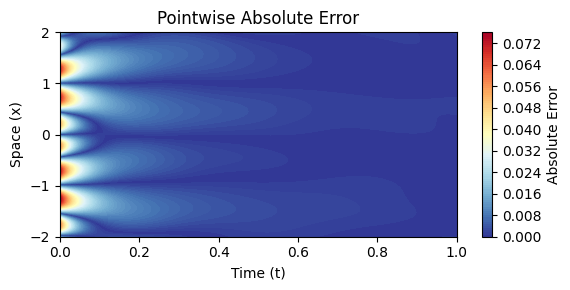

In [ ]:
plt.figure(figsize=(6, 3))
cp = plt.contourf(
    t_pinn.flatten(),                  # time axis
    x_pinn.flatten(),                  # space axis
    error.T,                           # transpose to align x and t properly
    levels=100,                        # increase resolution of contours
    cmap='RdYlBu_r'
)
plt.colorbar(cp, label='Absolute Error')
plt.xlabel('Time (t)')
plt.ylabel('Space (x)')
plt.title('Pointwise Absolute Error')
plt.tight_layout()
plt.show()
